In [121]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [122]:
df=pd.read_csv("dataTest.csv")

In [123]:
df=pd.DataFrame(df)
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,psnr,ssim_first,ssim_second,type,server
0,h1,1898.137,0.0,66,4,3000000,2011.425000,31.225948,0.985150,18.282783,3,h10
1,h2,2240.660,0.0,44,3,3000000,1859.161290,31.225948,0.985150,18.282674,3,h14
2,h3,2196.294,0.0,40,2,3000000,9084.620155,22.700112,0.956348,13.599976,3,h14
3,h4,1298.732,0.0,60,3,3000000,25815.963636,22.301604,0.960533,14.037636,3,h14
4,h5,338.105,0.0,92,4,3000000,37246.273632,22.510259,0.958593,13.829213,3,h10


In [124]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,372.0,1.013924e+03,1.044463e+03,1.529400e+02,3.080392e+02,4.165060e+02,1.816610e+03,4.744949e+03
packetLoss,372.0,3.584229e-01,2.681804e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.333333e+01
latency,372.0,7.887634e+01,6.582584e+01,1.300000e+01,5.300000e+01,7.500000e+01,9.125000e+01,1.035000e+03
hopCount,372.0,3.110215e+00,1.056977e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,372.0,5.470430e+06,2.723896e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,372.0,3.003598e+04,2.546959e+04,4.751573e+02,8.831790e+03,2.561418e+04,4.423177e+04,1.770201e+05
psnr,372.0,3.612166e+01,1.659998e+01,1.267172e+01,2.171745e+01,3.042446e+01,5.505260e+01,5.506194e+01
ssim_first,372.0,9.219058e-01,1.270834e-01,5.138590e-01,9.203712e-01,9.850165e-01,9.997650e-01,9.997650e-01
ssim_second,372.0,2.188350e+01,1.266005e+01,3.132379e+00,1.099111e+01,1.824384e+01,3.628266e+01,3.628266e+01
type,372.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


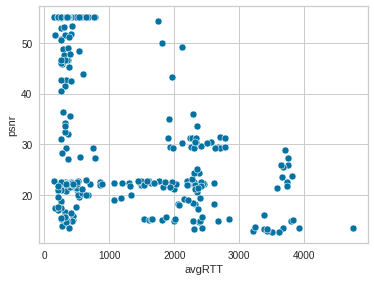

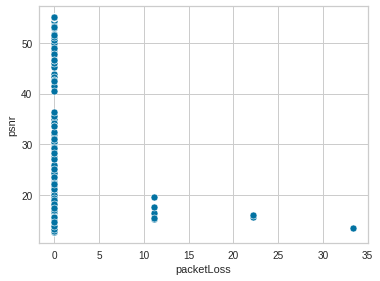

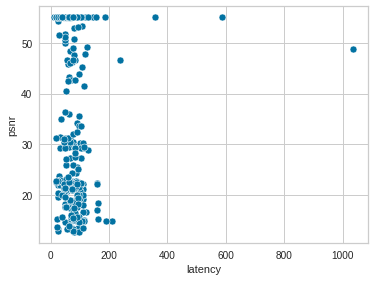

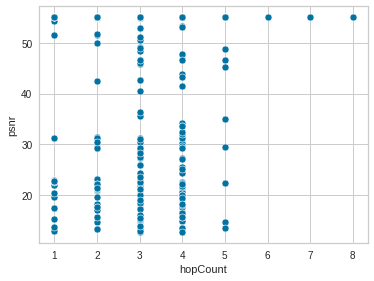

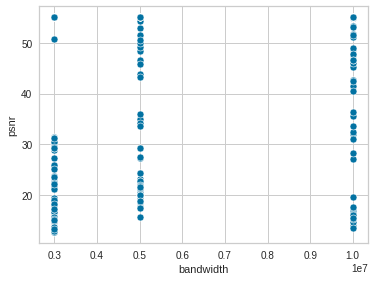

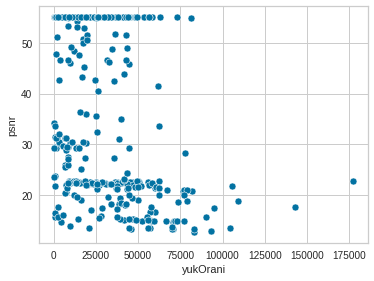

In [125]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [126]:
# sns.displot(df)

In [127]:
y=df["ssim_first"]
x=df.drop(["host","ssim_first","ssim_second","type","psnr","server"],axis="columns")
y


0      31.225948
1      31.225948
2      22.700112
3      22.301604
4      22.510259
         ...    
369    17.547052
370    16.075879
371    19.543094
372    13.477160
373    15.480775
Name: psnr, Length: 372, dtype: float64

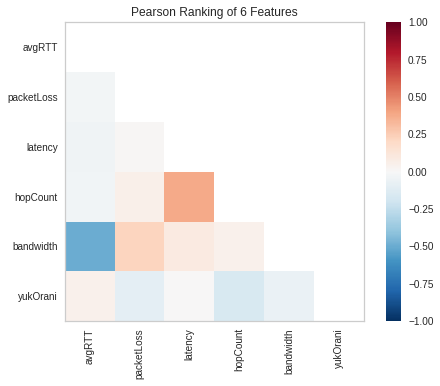

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [128]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [129]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,372.0,1.013924e+03,1.044463e+03,1.529400e+02,3.080392e+02,4.165060e+02,1.816610e+03,4.744949e+03
packetLoss,372.0,3.584229e-01,2.681804e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.333333e+01
latency,372.0,7.887634e+01,6.582584e+01,1.300000e+01,5.300000e+01,7.500000e+01,9.125000e+01,1.035000e+03
hopCount,372.0,3.110215e+00,1.056977e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,372.0,5.470430e+06,2.723896e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,1.000000e+07
yukOrani,372.0,3.003598e+04,2.546959e+04,4.751573e+02,8.831790e+03,2.561418e+04,4.423177e+04,1.770201e+05


In [130]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.5, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.4128720475553962


In [132]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.39187223841180363 test: 0.2644541287036115
max_depth : 2 --> score r2 : eğitim:0.5701863410747096 test: 0.41613979391615874
max_depth : 3 --> score r2 : eğitim:0.6855158701424733 test: 0.5782677415203394
max_depth : 4 --> score r2 : eğitim:0.7577372979200198 test: 0.6204707852879896
max_depth : 5 --> score r2 : eğitim:0.8161952671430979 test: 0.6743101149172688
max_depth : 6 --> score r2 : eğitim:0.870405793169744 test: 0.68344538974606
max_depth : 7 --> score r2 : eğitim:0.9062818484545043 test: 0.6965812013542565
max_depth : 8 --> score r2 : eğitim:0.9329127337222325 test: 0.6804973756388807
max_depth : 9 --> score r2 : eğitim:0.9469846395868652 test: 0.6726691314379687
max_depth : 10 --> score r2 : eğitim:0.951658916429206 test: 0.6810545776928574
max_depth : 11 --> score r2 : eğitim:0.9546346637905669 test: 0.6705814790006408
max_depth : 12 --> score r2 : eğitim:0.9542683452408459 test: 0.6825265894263999
max_depth : 13 --> score r2 : eğitim:0.

In [133]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.4577904372948881
n_neigbors : 2 --> score r2 : eğitim:0.837064981857266 test: 0.5773859698504779
n_neigbors : 3 --> score r2 : eğitim:0.7767177217865807 test: 0.5887409861964886
n_neigbors : 4 --> score r2 : eğitim:0.7285223851925864 test: 0.576359110278633
n_neigbors : 5 --> score r2 : eğitim:0.6796245772923183 test: 0.5832739258645949
n_neigbors : 6 --> score r2 : eğitim:0.6498863353289728 test: 0.5680514398655299
n_neigbors : 7 --> score r2 : eğitim:0.6136292447125284 test: 0.5627771429714197
n_neigbors : 8 --> score r2 : eğitim:0.60203599224809 test: 0.5415866699011291
n_neigbors : 9 --> score r2 : eğitim:0.5976819964464644 test: 0.5344167775326905
n_neigbors : 10 --> score r2 : eğitim:0.6046866343875478 test: 0.5284241224545054
n_neigbors : 11 --> score r2 : eğitim:0.5936699096739633 test: 0.5397734748790832
n_neigbors : 12 --> score r2 : eğitim:0.5914243751526316 test: 0.5503613343091706
n_neigbors : 13 --> score r2 : eğitim:0.5874

In [134]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.3685115680733253 test: 0.23301992770699553
max_depth : 2 --> score r2 : eğitim:0.5334633337721316 test: 0.32468394240929543


max_depth : 3 --> score r2 : eğitim:0.6759867820325877 test: 0.5157849087788942
max_depth : 4 --> score r2 : eğitim:0.7205932111633101 test: 0.5689461993576337
max_depth : 5 --> score r2 : eğitim:0.7901932028696739 test: 0.694849550397127
max_depth : 6 --> score r2 : eğitim:0.8381322252943437 test: 0.6414683272788906
max_depth : 7 --> score r2 : eğitim:0.9028934547361893 test: 0.46229242351190036
max_depth : 8 --> score r2 : eğitim:0.936609216469246 test: 0.4326793914489975
max_depth : 9 --> score r2 : eğitim:0.9661932304386569 test: 0.43382970333213067
max_depth : 10 --> score r2 : eğitim:0.9843199994484936 test: 0.4941809632137162
max_depth : 11 --> score r2 : eğitim:0.9948506651045438 test: 0.36901253478107565
max_depth : 12 --> score r2 : eğitim:0.9991434239158481 test: 0.4644553349393403
max_depth : 13 --> score r2 : eğitim:0.9996267557826837 test: 0.3850761820157069
max_depth : 14 --> score r2 : eğitim:1.0 test: 0.35759322769444934
max_depth : 15 --> score r2 : eğitim:1.0 test: 0

In [135]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.6703394663497464 test: 0.5737112289822885
max_depth : 2 --> score r2 : eğitim:0.8546346892711005 test: 0.6362766084576486
max_depth : 3 --> score r2 : eğitim:0.9571682682370374 test: 0.6463114419043305
max_depth : 4 --> score r2 : eğitim:0.9885579803557539 test: 0.6155735362201238
max_depth : 5 --> score r2 : eğitim:0.9974926256078 test: 0.5797032535327833
max_depth : 6 --> score r2 : eğitim:0.9995525348305263 test: 0.5782276809794907
max_depth : 7 --> score r2 : eğitim:0.9999769074028085 test: 0.6270755102445787
max_depth : 8 --> score r2 : eğitim:0.9999964265866661 test: 0.6058633803345921
max_depth : 9 --> score r2 : eğitim:0.9999999765961022 test: 0.5913916147335274


In [136]:
tahminGbr

array([39.68650984, 24.00598377, 22.09110912, 55.05027276, 18.46163807,
       25.88073254, 51.71629137, 31.55920278, 31.14450503, 54.67828364,
       15.02759533, 31.23724642, 54.28652695, 22.60095839, 56.51905888,
       13.47283968, 29.31924133, 25.99012997, 39.8882438 , 50.06746469,
       22.17436252, 23.46972356, 52.69399123, 22.28496984, 25.73606354,
       45.18897765, 13.28762338, 36.46030464, 55.1182266 , 27.21092646,
       29.36446035, 54.91314329, 22.49221347, 43.13337794, 35.93840982,
       22.7896537 , 54.2028987 , 25.82590584, 52.02712238, 50.0983383 ,
       14.91707079, 44.32548599, 31.23205891, 21.61934526, 32.85998894,
       15.68881214, 22.28877173, 21.91466155, 24.91295431, 14.81790606,
       48.42904616, 53.95846931, 47.29115646, 21.62068943, 15.37385624,
       50.56616812, 55.04882591, 22.35908023, 48.88312916, 54.48941635,
       49.6720636 , 47.26808462, 55.36059799, 30.2433289 , 28.94329075,
       45.68424455, 22.55176016, 47.27581089, 21.64953319, 51.22

In [137]:
yTest

328    51.225906
33     22.276804
15     22.521780
315    46.164110
57     19.163203
         ...    
130    29.250679
38     23.636383
11     22.557653
246    18.965389
186    55.052599
Name: psnr, Length: 186, dtype: float64

In [138]:
yTrain

305    55.052599
113    55.052599
180    23.043545
245    25.032794
233    18.441527
         ...    
71     55.052599
107    54.959859
271    12.671715
350    55.052599
103    55.052599
Name: psnr, Length: 186, dtype: float64

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

In [140]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.41287204750897877


In [141]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.5031056170861302
n_neigbors : 2 --> score r2 : eğitim:0.8482166220496423 test: 0.650401090239277
n_neigbors : 3 --> score r2 : eğitim:0.770013619995499 test: 0.7158559699744665
n_neigbors : 4 --> score r2 : eğitim:0.7121366848451339 test: 0.7209542804680866
n_neigbors : 5 --> score r2 : eğitim:0.6809535477543657 test: 0.6895907888782908
n_neigbors : 6 --> score r2 : eğitim:0.6612915724525599 test: 0.6656959254357988
n_neigbors : 7 --> score r2 : eğitim:0.6605530998119438 test: 0.6582823267154236
n_neigbors : 8 --> score r2 : eğitim:0.6633036761358757 test: 0.6550336914220047
n_neigbors : 9 --> score r2 : eğitim:0.6656699343466086 test: 0.6340825001588355
n_neigbors : 10 --> score r2 : eğitim:0.6406261727517046 test: 0.6212409040973896
n_neigbors : 11 --> score r2 : eğitim:0.6375537677016435 test: 0.6213697230573407
n_neigbors : 12 --> score r2 : eğitim:0.6226356172520763 test: 0.6102090024430322
n_neigbors : 13 --> score r2 : eğitim:0.61

In [142]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,bootstrap=True,criterion="friedman_mse",max_features='log2',max_leaf_nodes=None,n_estimators=100,n_jobs=1,random_state=42)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.37538348735133265 test: 0.3097678015195854
max_depth : 2 --> score r2 : eğitim:0.5250491907064068 test: 0.4405158867859992
max_depth : 3 --> score r2 : eğitim:0.6311291257302387 test: 0.5383395487291632
max_depth : 4 --> score r2 : eğitim:0.710996171749198 test: 0.5885100470319934
max_depth : 5 --> score r2 : eğitim:0.7853851708932815 test: 0.6226661973133305
max_depth : 6 --> score r2 : eğitim:0.83332845400794 test: 0.6460356956527737
max_depth : 7 --> score r2 : eğitim:0.8756916521774112 test: 0.6623406568210695
max_depth : 8 --> score r2 : eğitim:0.9054942377156564 test: 0.6656686809415392
max_depth : 9 --> score r2 : eğitim:0.9263416084712164 test: 0.6559641091213018
max_depth : 10 --> score r2 : eğitim:0.9378521886553107 test: 0.6625041852125976
max_depth : 11 --> score r2 : eğitim:0.9405500485620159 test: 0.6595025490565256
max_depth : 12 --> score r2 : eğitim:0.9467191705185898 test: 0.6586648122117242
max_depth : 13 --> score r2 : eğitim:0.

In [143]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.3685115680733253 test: 0.23301992770699564
max_depth : 2 --> score r2 : eğitim:0.5334633337721315 test: 0.3246839424092953
max_depth : 3 --> score r2 : eğitim:0.6759867820325877 test: 0.5157849087788942
max_depth : 4 --> score r2 : eğitim:0.7205932111633101 test: 0.5749458903902582
max_depth : 5 --> score r2 : eğitim:0.7901932028696739 test: 0.694849550397127
max_depth : 6 --> score r2 : eğitim:0.8381322252943437 test: 0.6587144094760325
max_depth : 7 --> score r2 : eğitim:0.9028934547361893 test: 0.4553195626247786
max_depth : 8 --> score r2 : eğitim:0.9366092164692459 test: 0.444236469652491
max_depth : 9 --> score r2 : eğitim:0.9598940511534069 test: 0.5026105916931799
max_depth : 10 --> score r2 : eğitim:0.9806714388751385 test: 0.4071192624913429
max_depth : 11 --> score r2 : eğitim:0.9951209433978953 test: 0.47038472696907774
max_depth : 12 --> score r2 : eğitim:0.9991434239158481 test: 0.4768638904291953
max_depth : 13 --> score r2 : eğitim:

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.6703394663497464 test: 0.5737112289822885
max_depth : 2 --> score r2 : eğitim:0.8546346892711005 test: 0.6375203112546761
max_depth : 3 --> score r2 : eğitim:0.9571682682370374 test: 0.6459598003001976
max_depth : 4 --> score r2 : eğitim:0.9885579803557539 test: 0.6147684021266651
max_depth : 5 --> score r2 : eğitim:0.9974926256078 test: 0.5792489429519848
max_depth : 6 --> score r2 : eğitim:0.9996943490367755 test: 0.5883459964004236
max_depth : 7 --> score r2 : eğitim:0.9999769074028085 test: 0.6286748716533385
max_depth : 8 --> score r2 : eğitim:0.9999977745324855 test: 0.6204833218347507
max_depth : 9 --> score r2 : eğitim:0.9999998881473201 test: 0.5882995056641833
